In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-peace-index/peace_index.csv


# Carregando os dados no Dataframe

In [13]:
#Abrindo o arquivo csv e definindo o separador ';'
df = pd.read_csv('/kaggle/input/global-peace-index/peace_index.csv',sep = ';',decimal = ',')

In [14]:
#Verificando os dados
df.head(5)

,Country,iso3c,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,3.153,3.246,3.087,3.038,3.069,3.101,3.095,3.108,3.369,3.480,3.513,3.636,3.626,3.626,3.626,3.434
1,Angola,AGO,1.655,1.827,1.615,1.816,1.615,1.615,1.609,1.408,1.403,1.403,1.610,1.615,1.413,1.621,1.608,1.639
2,Albania,ALB,1.247,1.270,1.293,1.293,1.293,1.282,1.270,1.259,1.259,1.247,1.236,1.224,1.414,1.403,1.403,1.403
3,United Arab Emirates,ARE,1.000,1.000,1.000,1.213,1.238,1.241,1.253,1.264,1.477,1.517,1.563,1.598,1.833,1.701,1.689,1.678
4,Argentina,ARG,1.403,1.604,1.604,1.403,1.403,1.604,1.403,1.403,1.403,1.403,1.201,1.201,1.201,1.201,1.201,1.201


In [15]:
#Estatísticas descritivas básicas
df.describe()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,161.000000,161.000000,161.000000,161.000000,162.000000,162.000000,162.000000,162.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,1.616764,1.635130,1.652335,1.647776,1.652383,1.665549,1.666302,1.669086,1.703908,1.744160,1.762656,1.773644,1.786423,1.791233,1.814706,1.842847
std,0.525138,0.514025,0.515767,0.496095,0.489738,0.508557,0.529723,0.537952,0.586367,0.601486,0.601547,0.616621,0.610809,0.619283,0.625616,0.632061
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.213000,1.218000,1.236000,1.252000,1.302000,1.284250,1.272250,1.403000,1.403000,1.403000,1.403000,1.403000,1.403000,1.403000,1.403000,1.403000
50%,1.420000,1.476000,1.604000,1.604000,1.555000,1.604000,1.604000,1.544500,1.604000,1.604000,1.610000,1.620000,1.637000,1.641000,1.677000,1.706000
75%,1.821000,1.851000,1.982000,2.006000,2.006000,1.921750,1.858500,1.851000,1.936000,2.023000,2.050500,2.029500,2.019500,2.033500,2.028500,2.092500
max,3.483000,3.388000,3.234000,3.240000,3.299000,3.224000,3.535000,3.725000,3.828000,3.828000,3.828000,3.828000,3.828000,3.828000,3.633000,3.486000


# Tendência de Paz

In [16]:
#Escolha do país para ser feito um gráfico em linha
pais = input('Dê o nome do país para exibir um gráfico em linha: ')

Dê o nome do país para exibir um gráfico em linha:  Brazil


In [17]:
#Verificando se o país escolhido existe
df_pais = df[df['Country'] == pais]
if df_pais.empty:
    print('País não foi encontrado.')

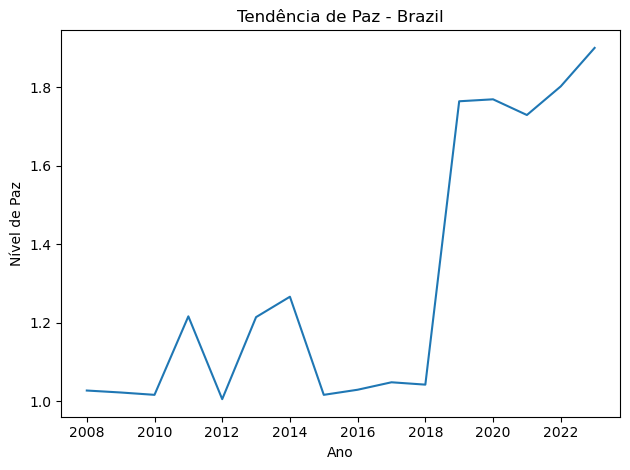

In [18]:
anos = df_pais.columns[2:].astype(int)
valores_paz = df_pais.iloc[:, 2:].values.flatten().astype(float)

plt.plot(anos, valores_paz)
plt.xlabel('Ano')
plt.ylabel('Nível de Paz')
plt.title(f'Tendência de Paz - {pais}')
plt.tight_layout()
plt.show()

# Média de Paz por Ano

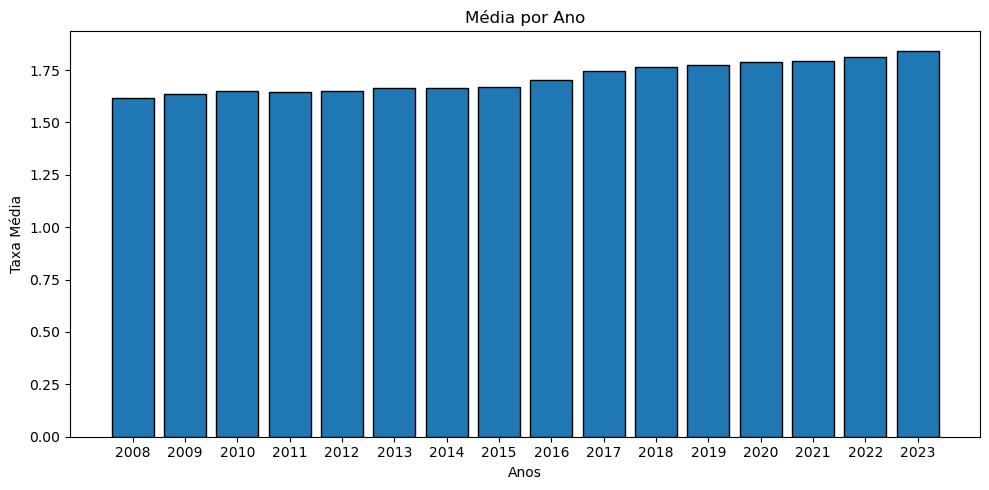

In [19]:
#Média por ano
media = df.iloc[:, 2:].mean()
anos = media.index

plt.figure(figsize=(10, 5))
plt.bar(anos, media, edgecolor='black')
plt.xlabel('Anos')
plt.ylabel('Taxa Média')
plt.title('Média por Ano')
plt.tight_layout()
plt.show()


# Países com Maior e Menor Índice Médio de Paz

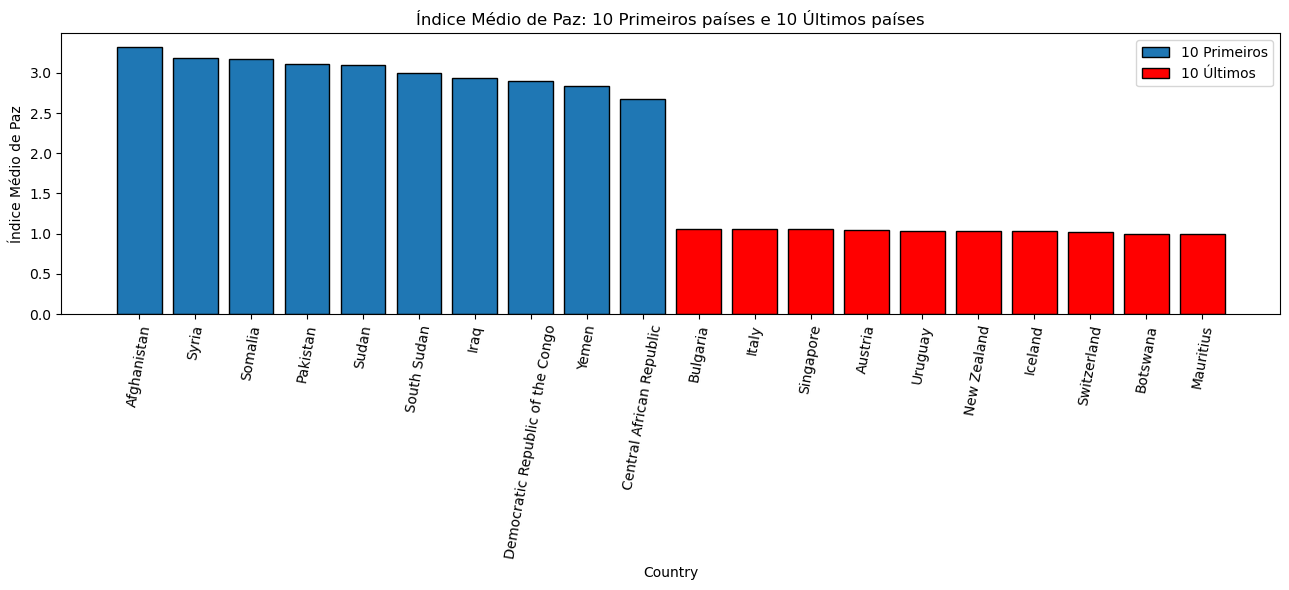

In [20]:
#Criando uma nova coluna e calculando a média horizontalmente mean(axis=1)
df['Indice Médio de Paz'] = df.iloc[:, 2:].mean(axis=1)

#Classificando o Dataframe pela coluna "Indice Médio de Paz" e ordenando decrescentemente
df_ordenado = df.sort_values('Indice Médio de Paz', ascending=False)
top_10_paises = df_ordenado.head(10)
bottom_10_paises = df_ordenado.tail(10)

plt.figure(figsize=(13, 6))
plt.bar(top_10_paises['Country'], top_10_paises['Indice Médio de Paz'], label='10 Primeiros', edgecolor='black')
plt.bar(bottom_10_paises['Country'], bottom_10_paises['Indice Médio de Paz'], label='10 Últimos',  edgecolor='black', color='red')
plt.xlabel('Country')
plt.ylabel('Índice Médio de Paz')
plt.title('Índice Médio de Paz: 10 Primeiros países e 10 Últimos países')
plt.xticks(rotation=80)
plt.legend()
plt.tight_layout()
plt.show()

# Comparação do Índice de Paz dos Países Selecionados

In [21]:
paises_selecionados = []

while True:
    pais = input(f'Digite o nome do país que deseja adicionar na comparação: ')
    paises_selecionados.append(pais)
    
    resposta = input("Deseja adicionar mais um país? (S/N): ")
    if resposta.upper() != 'S':
        break

Digite o nome do país que deseja adicionar na comparação:  Brazil
Deseja adicionar mais um país? (S/N):  s
Digite o nome do país que deseja adicionar na comparação:  Russia
Deseja adicionar mais um país? (S/N):  s
Digite o nome do país que deseja adicionar na comparação:  Angola
Deseja adicionar mais um país? (S/N):  n


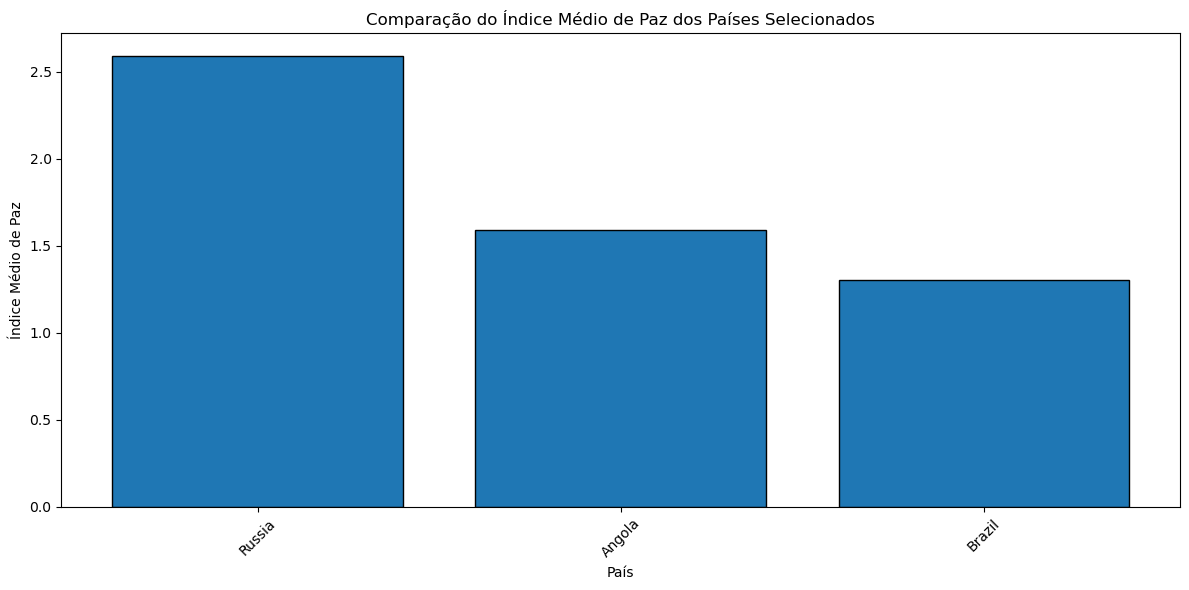

In [22]:
# Filtrar os dados apenas para os países selecionados
df_selecionados = df[df['Country'].isin(paises_selecionados)]

# Ordenar os países por índice de paz em ordem decrescente
df_selecionados = df_selecionados.sort_values('Indice Médio de Paz', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_selecionados['Country'], df_selecionados['Indice Médio de Paz'], edgecolor='black')
plt.xlabel('País')
plt.ylabel('Índice Médio de Paz')
plt.title('Comparação do Índice Médio de Paz dos Países Selecionados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
